# Using *Py-Dreambooth* on a Local Jupyter Notebook 🧑‍💻
* Use *Py-Dreambooth* to easily create AI avatar images from photos of you, your family, friends, or pets!
* Please run on a machine with a GPU of 16GB or more (A T4 instance would also be adequate).

## Install the package
* Install the *Py-Dreambooth* python package as shown below.

In [ ]:
!pip install -q py-dreambooth

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.4/79.4 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.0/159.0 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 57.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 84.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 110.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 902.7/902.7 kB 67.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 107.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 63.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 94.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.6/211.6 MB 5.5 MB/s eta 0:00:0

## Import modules
* There are several types of model classes, but you'll be using the most basic model, the Stable Diffusion Dreambooth model `SDDreamboothModel`, but you don't need to worry about that right now. 🤷‍♂️

In [ ]:
from py_dreambooth.dataset import LocalDataset
from py_dreambooth.model import SdDreamboothModel
from py_dreambooth.predictor import LocalPredictor
from py_dreambooth.trainer import LocalTrainer
from py_dreambooth.utils.image_helpers import display_images
from py_dreambooth.utils.prompt_helpers import make_prompt

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml


## Prepare your data 📸

In [ ]:
DATA_DIR = "data"  # the directory with photos for the model to train on
OUTPUT_DIR = "models"  # The directory where the trained model files will be located

dataset = LocalDataset(DATA_DIR)

* Very important! In the `DATA_DIR` defined above, put the pictures (jpg or png) of the subject you want to train.
* For this task, you'll need about 10 to 20 solo, high-quality selfies taken with different backgrounds, lighting, and facial expressions. I think a great example can be found in [Joe Penna's GitHub repository](https://github.com/JoePenna/Dreambooth-Stable-Diffusion).

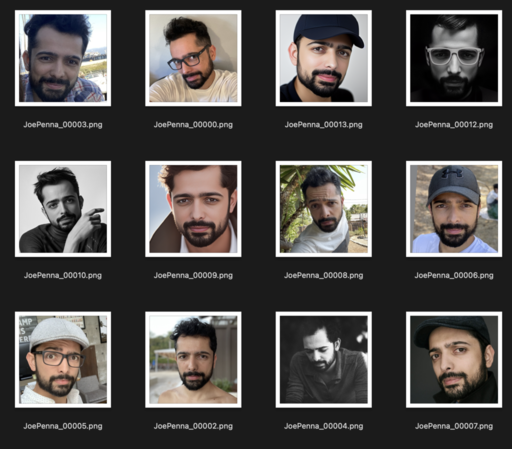

* Use the following image processing method to crop the images into a square centered on the face. If the subject the model is trying to learn is not a person (for example, a dog), set the `detect_face` argument to `False`.

In [ ]:
dataset = dataset.preprocess_images(detect_face=True)

A total of 20 images were found.


 65%|██████▌   | 13/20 [00:04<00:02,  2.64it/s]

No faces detected in the image 'instance_image_18.jpg'.


100%|██████████| 20/20 [00:07<00:00,  2.57it/s]

A total of 19 images were preprocessed and stored in the path 'data_preproc'.


## Train the model 🤖
* Now it's time to train the model! Tell the model the name of the subject you want to train (e.g., Joe) and the class it belongs to.
* When defining a model, one of the important arguments is how many iterations to train, or `max_train_steps`. It is generally accepted that 800 to 1200 steps are appropriate for a person, and 200 to 400 steps are appropriate for a non-human animal. The default value is 100 times the number of photos you have. You don't need to worry about that right now 🤷‍♂️, but if you don't like the results of the generated image below, this is the first parameter to adjust.

In [ ]:
SUBJECT_NAME = "sks"  # The name of the subject you want to learn
CLASS_NAME = "person"  # The class to which the subject you want to learn belongs

model = SdDreamboothModel(
    subject_name=SUBJECT_NAME,
    class_name=CLASS_NAME,
    # max_train_steps=1000,
)

trainer = LocalTrainer(output_dir=OUTPUT_DIR)

* Model training time can be as short as a few tens of minutes or as long as several hours.

In [ ]:
%%time
predictor = trainer.fit(model, dataset)

The model training has begun.
The model training has ended.


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


The model has loaded from the directory, 'models'.
CPU times: user 17.9 s, sys: 6.97 s, total: 24.9 s
Wall time: 1h 5min 44s


* If you restart the notebook kernel and then want to reload the models you've already trained, you can do so as follows.

In [ ]:
# predictor = LocalPredictor(model, OUTPUT_DIR)

## Create images as you wish! 💃
* Use the prompts to create any image you like. The prompt text should contain the subject name and class name defined above.
* Having trouble coming up with a good prompt? Don't worry. You can use the `make_prompt` function to generate a curated prompt at random. Check this out. 🙆‍♀️
* Creating great images takes patience. Play around with the prompts, but if the quality of the generation itself is problematic, you may need to retrain with better data and more appropriate training parameters.

The prompt is as follows:
A photo of sks person with Eiffel Tower in the background


  0%|          | 0/50 [00:00<?, ?it/s]

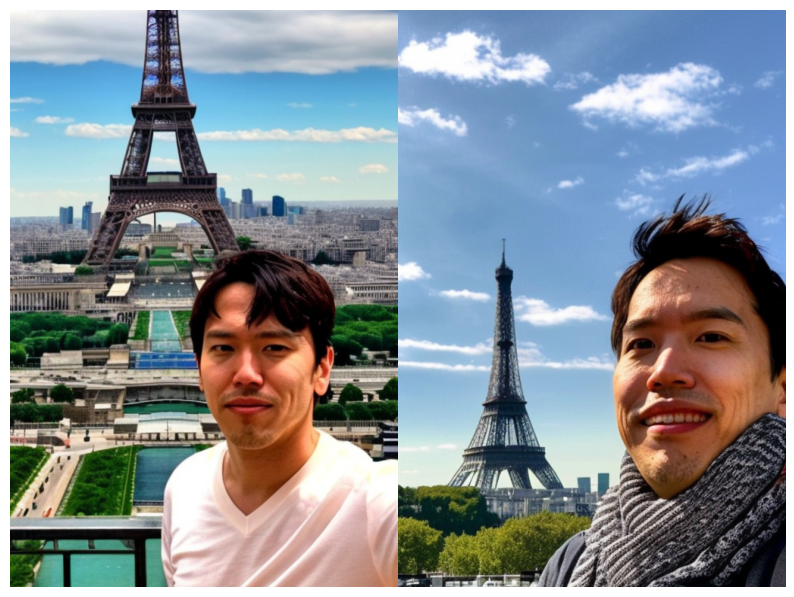

CPU times: user 20.7 s, sys: 1.04 s, total: 21.7 s
Wall time: 22 s


In [ ]:
%%time
prompt = f"A photo of {SUBJECT_NAME} {CLASS_NAME} with Eiffel Tower in the background"
# prompt = next(make_prompt(SUBJECT_NAME, CLASS_NAME))

print(f"The prompt is as follows:\n{prompt}")

images = predictor.predict(
    prompt, height=768, width=512, num_images_per_prompt=2,
)

display_images(images, fig_size=10)